In [1]:
import numpy as np
import math
from numpy.polynomial import chebyshev
from math import pi
from scipy.interpolate import barycentric_interpolate 
import matplotlib.pyplot as plt
from scipy.linalg import norm
import time

#Funciones de las que hay que calcular la interpolación
def runge(x):
    return 1/(1+25*(x**2))

#función seno vectorizada
sin_vec=np.vectorize(math.sin) 

def exponencial(x):
    return math.exp(-20*(x**2))

#función exponencial vectorizada
exp_vec=np.vectorize(exponencial)

#Nodos de Chebyshev
# Tomamos el polinomio T_11(x).  Hemos de poner los coeficientes en orden ascendente, es decir,  
# (1, 0, 3) devolvería 1*T_0(x) + 2*T_1(x) + 3*T_2(x).
coefs_Cheby_11 = [0]*11+[1]
coefs_Cheby_21 = [0]*21+[1]

######## Seno
abscisas_sin = np.linspace(-pi, pi, 100)
nodos_sin_11 = np.linspace(-pi,pi,11) 
nodos_sin_21 = np.linspace(-pi,pi,21) 
T11_sin = chebyshev.Chebyshev(coefs_Cheby_11, [-pi, pi])
nodos_cheby_sin_11 = T11_sin.roots()
T21_sin = chebyshev.Chebyshev(coefs_Cheby_21, [-pi, pi])
nodos_cheby_sin_21 = T21_sin.roots()

######## Runge
abscisas_runge = np.linspace(-1, 1, 100)
nodos_runge_11 = np.linspace(-1,1,11) 
nodos_runge_21 = np.linspace(-1,1,21) 
T11_runge = chebyshev.Chebyshev(coefs_Cheby_11, [-1, 1])
nodos_cheby_runge_11 = T11_runge.roots()
T21_runge = chebyshev.Chebyshev(coefs_Cheby_21, [-1, 1])
nodos_cheby_runge_21 = T21_runge.roots()

######## Gauss
abscisas_gauss = np.linspace(-1, 1, 100)
nodos_gauss_11 = np.linspace(-1,1,11) 
nodos_gauss_21 = np.linspace(-1,1,21) 
T11_gauss = chebyshev.Chebyshev(coefs_Cheby_11, [-1, 1])
nodos_cheby_gauss_11 = T11_gauss.roots()
T21_gauss = chebyshev.Chebyshev(coefs_Cheby_21, [-1, 1])
nodos_cheby_gauss_21 = T21_gauss.roots()



# Tarea 2: Splines cúbicos

A continuación se implementa y explica la interpolación basada en splines cúbicos. En primer lugar se muestra la función que calcula la interpolación dados los nodos de interpolación, la función a interpolar y un intervalo en el que mostrar los gráficos.

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline 
def inter_splines(nodos,funcion,intervalo, titulo):
    '''
    función que calcula la interpolación por splines cúbicos, dados los nodos, una función, 
    y un vector de abscisas que será usado para representar la función y evaluar el error.
    Se le pasa un título descriptivo  para mostrar en el gráfico y en la salida estándar.
    Parámetros de entrada:
        -nodos: vector de nodos usados para calcular los polinomios interpoladores por splines cúbicos
        -función: función que hay que interpolar
        -intervalo: vector de abscisas usadas para mostrar la función en un gráfico
        -titulo: descripción de la función y nodos utilizados para mostrar en las gráficas
    Salidas:
        -retorna los valores del polinomio interpolador en el "intervalo" enviado en parámetro de entrada
        -Muestra por pantalla el error absoluto como distancia euclídea entre los valores  de la función y los splines en el vector "intervalo"
        -Muestra por pantalla lo que duró el cálculo de los splines cúbicos 
        -pinta un gráfico en el que se incluyen:
            -nodos 
            -polinomio interpolador en "intervalo".
            -función en "intervalo"
    '''
    tituloCompleto="Interpol. por Splines Cúbicos: "+titulo
    print(tituloCompleto.center(100,'-'))
    inicio =time.perf_counter()
    pol = InterpolatedUnivariateSpline(nodos, funcion(nodos))
    fin = time.perf_counter()
    #print("El polinomio interpolador obtenido toma los valores:",pol(intervalo))
    print("Tiempo de ejecución de la interpolación por splines es:", fin-inicio,"s") 
    error=norm(pol(intervalo)-funcion(intervalo))
    print("Error absoluto",error)
    plt.plot(nodos, funcion(nodos), "ko", label="Función en Nodos")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(intervalo, pol(intervalo),'c',label='Splines Cúbicos')
    plt.plot(intervalo,funcion(intervalo),'g:',label='función')
    plt.title("Interpol. por Splines Cúbicos: "+titulo)
    plt.legend()
    plt.show()
    return pol

A continuación se realizan las llamadas para la función seno:

------------------------Interpol. por Splines Cúbicos: sen(x) 11 Nodos Equ.-------------------------
Tiempo de ejecución de la interpolación por splines es: 0.0008887000000186163 s
Error absoluto 0.009027003473026877


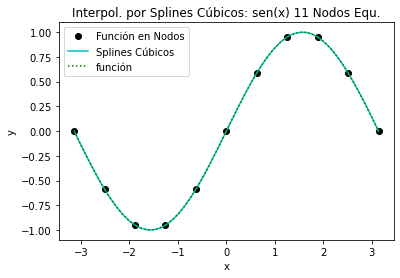

------------------------Interpol. por Splines Cúbicos: sen(x) 21 Nodos Equ.-------------------------
Tiempo de ejecución de la interpolación por splines es: 0.00022079999996549304 s
Error absoluto 0.0002358954232958513


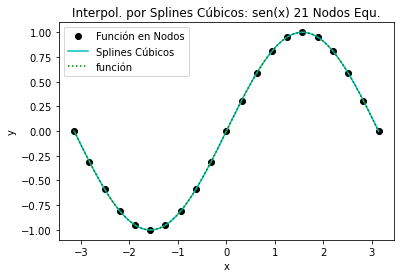

-----------------------Interpol. por Splines Cúbicos: sen(x) 11 Nodos Cheby.------------------------
Tiempo de ejecución de la interpolación por splines es: 0.0002694999999448555 s
Error absoluto 0.005999871912911967


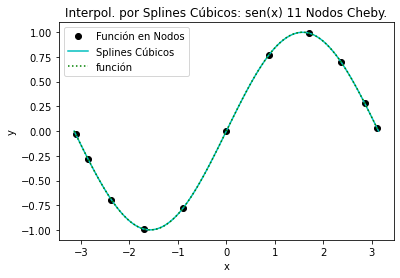

-----------------------Interpol. por Splines Cúbicos: sen(x) 21 Nodos Cheby.------------------------
Tiempo de ejecución de la interpolación por splines es: 0.0006664999999657084 s
Error absoluto 0.00036973961019245717


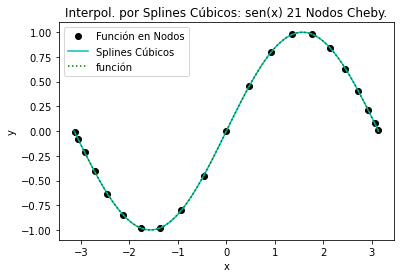

In [3]:
#función seno y 11 nodos equidistantes entre -pi y pi
inter_splines_sin_eq_11=inter_splines(nodos_sin_11,sin_vec,abscisas_sin, 'sen(x) 11 Nodos Equ.')
#función seno y 21 nodos equidistantes entre -pi y pi
inter_splines_sin_eq_21=inter_splines(nodos_sin_21,sin_vec,abscisas_sin,'sen(x) 21 Nodos Equ.')
# función seno con 11 nodos de Chebyshev entre -pi y pi
inter_splines_sin_cheby_11=inter_splines(nodos_cheby_sin_11,sin_vec,abscisas_sin,'sen(x) 11 Nodos Cheby.')
# función seno con 21 nodos de Chebyshev entre -pi y pi
inter_splines_sin_cheby_21=inter_splines(nodos_cheby_sin_21,sin_vec,abscisas_sin, 'sen(x) 21 Nodos Cheby.')

<h2> Conclusiones función seno</h2>
Las gráficas muestran que la función seno se aproxima  bastante bien en todos los casos con los splines cúbicos, sin  mostrar ninguna oscilación.

Vemos que, tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. Comparando los nodos equiespaciados con Chebyshev, vemos que el error es similar, con 21 puntos el error es menor para los puntos equiespaciados, pero para 11 puntos es menor con nodos Chebyshev. En todo caso no hay una ganancia clara de ninguna de las dos opciones (equiespaciados vs Chebyshev), probablemente porque la función seno no tiene grandes picos en el centro del intervalo ni en los bordes del mismo sino que está uniformemente distribuida en y.

En cuanto a los tiempos de ejecución vemos que son bastante bajos (menos de 1 ms), y aunque deberian ser inferiores para 11 nodos que para 21 (dado que se tienen que hacer menos cálculos), en ocasiones se obtiene que la duración es menor para 21 nodos que para 11. Esto se produce probablemente a que la duración medida depende de la carga del procesador en el instante de ejecución. Suponemos que si hubiese mucha más diferencia en el número de nodos se podría ver una tendencia más clara, pero de 11 a 21 no se nota.

-------------------------Interpol. por Splines Cúbicos: Runge 11 Nodos Equ.-------------------------
Tiempo de ejecución de la interpolación por splines es: 0.00022180000007665512 s
Error absoluto 0.07140021086674511


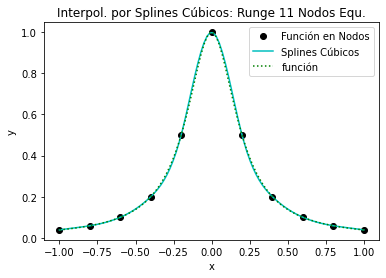

-------------------------Interpol. por Splines Cúbicos: Runge 21 Nodos Equ.-------------------------
Tiempo de ejecución de la interpolación por splines es: 0.00046820000000025175 s
Error absoluto 0.008743323193602829


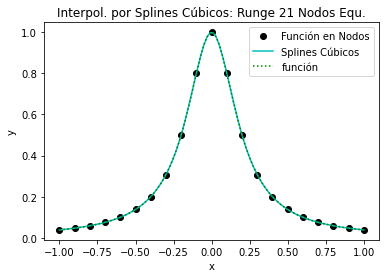

------------------------Interpol. por Splines Cúbicos: Runge 11 Nodos Cheby.------------------------
Tiempo de ejecución de la interpolación por splines es: 0.00022090000004482135 s
Error absoluto 0.3013534309816373


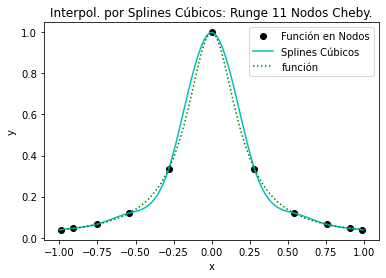

------------------------Interpol. por Splines Cúbicos: Runge 21 Nodos Cheby.------------------------
Tiempo de ejecución de la interpolación por splines es: 0.0003093999999919106 s
Error absoluto 0.006235587514789535


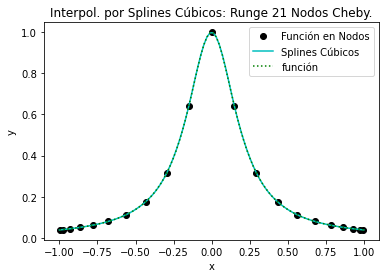

In [4]:
#función runge y 11 nodos equidistantes entre -1 y 1
inter_splines_runge_eq_11=inter_splines(nodos_runge_11,runge,abscisas_runge, 'Runge 11 Nodos Equ.')
#función runge y 21 nodos equidistantes entre -1 y 1
inter_splines_runge_eq_21=inter_splines(nodos_runge_21,runge,abscisas_runge, 'Runge 21 Nodos Equ.')
# función runge con 11 nodos de Chebyshev entre -1 y 1
inter_splines_runge_cheby_11=inter_splines(nodos_cheby_runge_11,runge,abscisas_runge,'Runge 11 Nodos Cheby.')
# función runge con 21 nodos de Chebyshev entre -1 y 1
inter_splines_runge_cheby_21=inter_splines(nodos_cheby_runge_21,runge,abscisas_runge, 'Runge 21 Nodos Cheby.')

<h2> Conclusiones función de Runge</h2>
Por las gráficas se puede ver que la función de RUnge se aproxima muy bien con splines cúbicos, dado que no se presentan las oscilaciones (efecto Runge) que aparecen en otras interpolaciones. Aparentemente los splines cúbicos son la mejor opción para interpolar esta función.  

En cuanto a los errores, vemos que, tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. Comparando los nodos Chebyshev con los equiespaciados, parece que con un número de nodos bajo (11) Chebyshev es claramente peor con un error más elevado, sin embargo al subir los nodos a 21 los errores son similares, siendo incluso un poco más reducido en Chebyshev.

Respecto a los tiempos de ejecución, las conclusiones son similares que para la función seno. En general son bastante bajos en todos los casos (menos de 1 ms), y pueden cambiar bastante dependiendo del momento de ejecución. 

--------------------Interpol. por Splines Cúbicos: exp(-20*(x**2)) 11 Nodos Equ.--------------------
Tiempo de ejecución de la interpolación por splines es: 0.0006789999999909924 s
Error absoluto 0.06686923694822235


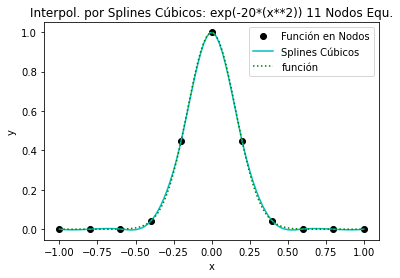

--------------------Interpol. por Splines Cúbicos: exp(-20*(x**2)) 21 Nodos Equ.--------------------
Tiempo de ejecución de la interpolación por splines es: 0.0006639999999151769 s
Error absoluto 0.004213129552233947


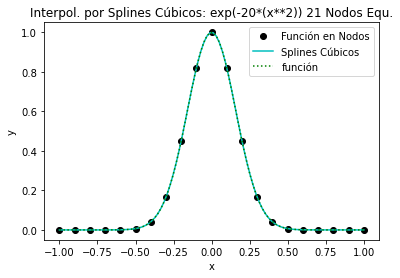

-------------------Interpol. por Splines Cúbicos: exp(-20*(x**2)) 11 Nodos Cheby.-------------------
Tiempo de ejecución de la interpolación por splines es: 0.0002676999999948748 s
Error absoluto 0.11296536559518096


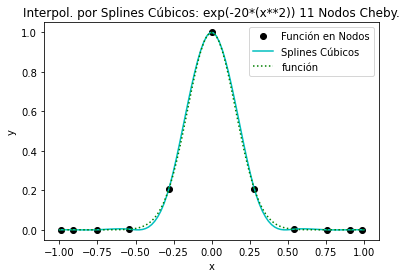

-------------------Interpol. por Splines Cúbicos: exp(-20*(x**2)) 21 Nodos Cheby--------------------
Tiempo de ejecución de la interpolación por splines es: 0.0002785000001495064 s
Error absoluto 0.02838334660763718


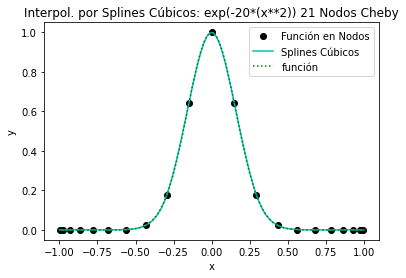

In [6]:
#función gauss y 11 nodos equidistantes entre -1 y 1
inter_splines_gauss_eq_11=inter_splines(nodos_gauss_11,exp_vec,abscisas_gauss,'exp(-20*(x**2)) 11 Nodos Equ.')
#función gauss y 21 nodos equidistantes entre -1 y 1
inter_splines_gauss_eq_21=inter_splines(nodos_gauss_21,exp_vec,abscisas_gauss,'exp(-20*(x**2)) 21 Nodos Equ.')
# función gauss con 11 nodos de Chebyshev entre -1 y 1
inter_splines_gauss_cheby_11=inter_splines(nodos_cheby_gauss_11,exp_vec,abscisas_gauss,'exp(-20*(x**2)) 11 Nodos Cheby.')
# función gauss con 21 nodos de Chebyshev entre -1 y 1
inter_splines_gauss_cheby_21=inter_splines(nodos_cheby_gauss_21,exp_vec,abscisas_gauss, 'exp(-20*(x**2)) 21 Nodos Cheby')

<h2> Conclusiones función exp(-20*(x**2))</h2>
Viendo las gráficas, se puede llegar a una conclusión similar que con la función de Runge: la interpolación por splines cúbicos es muy similar a la función original, sin mostrar oscilaciones. Los  splines cúbicos parecen la mejor opción  para aproximar esta función.

En cuanto a los errores, vemos que tanto para los nodos equiespaciados como para los nodos de Chebyshev, el error es menor para 21 puntos que para 11. EN este  caso además se puede ver que la interpolación con nodos Chebyshev tiene más error que los nodos equiespaciados (p.ej. para 21 puntos, con nodos equiespaciados 0.004213129552233947 y con Chebyshev:0.02838334660763718). Esto puede deberse a que los nodos Chebyshev se concentran más en los bordes del intervalo mientras que esta función tiene un pico concentrado en el centro  del intervalo, donde menos nodos hay, digamos que hay menos concentración de nodos donde la función  tiene valores distintos de 0. Con la función de Runge pasaba algo parecido y sin embargo el error con nodos Chebyshev era parecido a los nodos equiespaciados, ¿quizá porque los splines ajustan mejor la función de Runge que la exponencial?

Respecto a los tiempos de ejecución, las conclusiones son similares que para el resto de funciones. En general son bastante bajos en todos los casos (menos de 1 ms), y pueden cambiar bastante dependiendo del momento de ejecución. 